In [112]:
from numpy import save
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

def datos(file):
    data = mne.io.read_raw_edf(f'{file}.edf')
    raw_data = data.get_data()
    events, events_id = mne.events_from_annotations(data)
    tmax = 30. - 1. / data.info['sfreq']  # tmax in included

    epochs_train = mne.Epochs(raw=data, events=events,
                              event_id=events_id, tmin=0., tmax=tmax, baseline=None, event_repeated='merge')
    patatuela = epochs_train.load_data()
    id_to_class_dict = {value:key for key, value in patatuela.event_id.items()}

    objective_stages = ['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']
    epochs_to_df = [a for a in patatuela]
    epochs_to_df = []
    label_to_df = []
    for epoch, label in zip(patatuela, patatuela.events[:,-1]):
        # print(label)
        label = id_to_class_dict[label]
        if label in objective_stages:
            # print("True")
            epochs_to_df.append(epoch)
            label_to_df.append(label)
    dict_to_df = {"Epoch":epochs_to_df,"Label":label_to_df}
    df1=pd.DataFrame(dict_to_df)
    valores=df1.Epoch.values
    channels = data.ch_names
    diccionarios=[dict(zip(channels, sublist)) for sublist in valores]
    c3=[d['C3'] for d in diccionarios]
    c4=[d['C4'] for d in diccionarios]
    o1=[d['O1'] for d in diccionarios]
    o2=[d['O2'] for d in diccionarios]
    loc=[d['LOC'] for d in diccionarios]
    roc=[d['ROC'] for d in diccionarios]
    chin=[d['CHIN1'] for d in diccionarios]
#     sc=StandardScaler()
#     c3_sc=(c3-np.mean(c3))/np.std(c3)
#     c4_sc=(c4-np.mean(c4))/np.std(c4)
#     o1_sc=(o1-np.mean(o1))/np.std(o1)
#     o2_sc=(o2-np.mean(o2))/np.std(o2)
#     loc_sc=(loc-np.mean(loc))/np.std(loc)
#     roc_sc=(roc-np.mean(roc))/np.std(roc)
#     chin_sc=(chin-np.mean(chin))/np.std(chin)
    matriz=np.array([c3,c4,o1,o2,loc,roc,chin])
    
    matriz=np.transpose(matriz,axes=(1,2,0))

    name=file
    save(f'datos_{name}.npy', matriz)
    df1.Label.to_csv(f'Etiquetas_{name}.csv',index=None)

    return diccionarios,valores,channels, df1.Label

In [2]:
X_psg1=np.load('datos_PSG1.npy')
X_psg2=np.load('datos_PSG2.npy')
X_psg3=np.load('datos_PSG3.npy')
X_psg4=np.load('datos_PSG4.npy')
X_psg5=np.load('datos_PSG5.npy')
X_psg6=np.load('datos_PSG6.npy')
X_psg7=np.load('datos_PSG7.npy')
X_psg8=np.load('datos_PSG8.npy')
X_psg9=np.load('datos_PSG9.npy')
X_psg11=np.load('datos_PSG11.npy')
X_psg12=np.load('datos_PSG12.npy')
X_psg13=np.load('datos_PSG13.npy')
X_psg14=np.load('datos_PSG14.npy')

y_psg1=pd.read_csv('Etiquetas_PSG1.csv')
y_psg2=pd.read_csv('Etiquetas_PSG2.csv')
y_psg3=pd.read_csv('Etiquetas_PSG3.csv')
y_psg4=pd.read_csv('Etiquetas_PSG4.csv')
y_psg5=pd.read_csv('Etiquetas_PSG5.csv')
y_psg6=pd.read_csv('Etiquetas_PSG6.csv')
y_psg7=pd.read_csv('Etiquetas_PSG7.csv')
y_psg8=pd.read_csv('Etiquetas_PSG8.csv')
y_psg9=pd.read_csv('Etiquetas_PSG9.csv')
y_psg11=pd.read_csv('Etiquetas_PSG11.csv')
y_psg12=pd.read_csv('Etiquetas_PSG12.csv')
y_psg13=pd.read_csv('Etiquetas_PSG13.csv')
y_psg14=pd.read_csv('Etiquetas_PSG14.csv')

In [3]:
from matplotlib.ticker import MaxNLocator
from IPython.display import SVG, display, clear_output
import matplotlib.pyplot as plt

def grafica_entrenamiento(tr_acc, val_acc, tr_loss, val_loss, best_i,
                          figsize=(10,4)):
    plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    plt.plot(1+np.arange(len(tr_acc)),  100*np.array(tr_acc))
    plt.plot(1+np.arange(len(val_acc)), 100*np.array(val_acc))
    plt.plot(1+best_i, 100*val_acc[best_i], 'or')
    plt.title('tasa de acierto del modelo (%)', fontsize=18)
    plt.ylabel('tasa de acierto (%)', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(1,2,2)
    plt.plot(1+np.arange(len(tr_acc)), np.array(tr_loss))
    plt.plot(1+np.arange(len(val_acc)), np.array(val_loss))
    plt.plot(1+best_i, val_loss[best_i], 'or')
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [4]:
import tensorflow

X_juntados=tensorflow.concat([X_psg1,X_psg2,X_psg3,X_psg4,X_psg5,X_psg6,X_psg7,X_psg8,X_psg9,X_psg11,X_psg12,X_psg13,X_psg14],axis=0).numpy()
# y_juntados=tensorflow.concat([y_psg2,y_psg2],axis=0).numpy()

In [5]:
X_juntados.shape

(10401, 15360, 7)

In [6]:
y_todos=np.concatenate([y_psg1,y_psg2,y_psg3,y_psg4,y_psg5,y_psg6,y_psg7,y_psg8,y_psg9,y_psg11,y_psg12,y_psg13,y_psg14])

In [9]:
from collections import Counter

li,tri=np.unique(y_todos,return_counts=True)
dict(zip(li,tri))

{'Sleep stage N1': 772,
 'Sleep stage N2': 4479,
 'Sleep stage N3': 2486,
 'Sleep stage R': 931,
 'Sleep stage W': 1733}

In [10]:
X2=np.transpose(X_juntados,axes=(2,1,0))

In [11]:
X2_sc=np.array([(x-np.mean(x))/(np.std(x)) for x in X2])

In [12]:
from sklearn.preprocessing import Normalizer

norm=Normalizer()

X2_sc=np.transpose(np.array([(norm.fit_transform(x)) for x in X2]),axes=(2,1,0))

In [13]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_todos_bin=le.fit_transform(y_todos)

/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
from collections import Counter

unique, counts = np.unique(y_todos_bin, return_counts=True)
dict(zip(unique, counts))

{0: 772, 1: 4479, 2: 2486, 3: 931, 4: 1733}

In [24]:
y_todos_bin2=pd.DataFrame(y_todos_bin)[0]

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X2_sc,y_todos_bin2,train_size=0.65,shuffle=True)

In [54]:
import pickle

opciones = {"inputs_train_definitivo": X_train,"inputs_test_definitivo": X_test,'output_train_definitivo':y_train,'output_test_definitivo':y_test}
with open("inputs_definitivo.pkl", "wb") as f:
    pickle.dump(opciones, f)

In [27]:
from tensorflow.keras.regularizers import L1
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling1D,BatchNormalization, UpSampling1D,Input,Dense,LSTM,MaxPooling1D, Dropout,Conv1D, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import seaborn as sns
import tensorflow
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

input1=Input(shape=(15360,7))
conv1=Conv1D(74, kernel_size=256, padding='same', strides=128, activation="relu")(input1)
max1=MaxPooling1D(8)(conv1)
drop1=Dropout(0.5)(max1)
conv2=Conv1D(74, kernel_size=8, padding='same', strides=1, activation="relu")(drop1)
conv3=Conv1D(74, kernel_size=8, padding='same', strides=1, activation="relu")(conv2)
conv4=Conv1D(74, kernel_size=8, padding='same', strides=1, activation="relu")(conv3)
max2=MaxPooling1D(4)(conv4)
drop2=Dropout(0.5)(max2)
lstm1=LSTM(74)(drop2)
dense1=Dense(5,'softmax')(lstm1)
model=Model(input1,dense1)
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15360, 7)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 120, 74)           132682    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 74)            0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 74)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 74)            43882     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 74)            43882     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 15, 74)            43882 

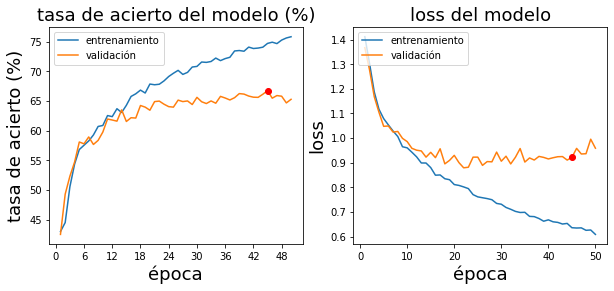

In [28]:
filepath='definitiva.h5'
checkpoint   = [EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
                ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')]

acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

epochs=50
batch_size=64


for e in range(epochs):
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=1,
                        callbacks=checkpoint,
                        verbose=1,
                        validation_data=(X_test, y_test))

    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
              best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]

    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])

    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

In [30]:
y_pred=np.argmax(model.predict(X_test),axis=1)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,target_names=lista2))

                precision    recall  f1-score   support

Sleep stage N1       0.47      0.39      0.43       285
Sleep stage N2       0.67      0.77      0.72      1548
Sleep stage N3       0.64      0.67      0.65       864
 Sleep stage R       0.65      0.59      0.61       326
 Sleep stage W       0.71      0.50      0.58       618

      accuracy                           0.65      3641
     macro avg       0.63      0.58      0.60      3641
  weighted avg       0.65      0.65      0.65      3641



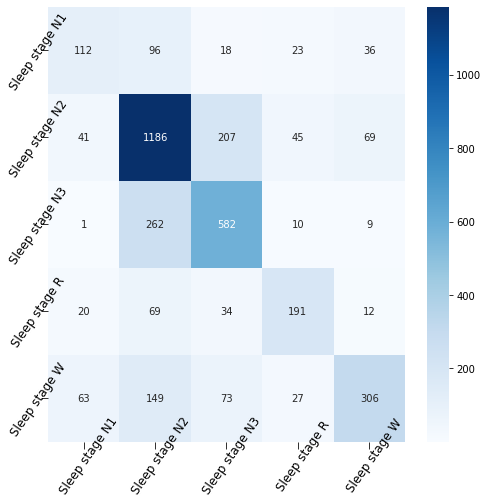

In [69]:
y_pred=np.argmax(model.predict(X_test),axis=1)

fig, ax = plt.subplots(figsize=(8,8))

cm=confusion_matrix(y_test,y_pred)
lista2=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']
sns.heatmap(pd.DataFrame(cm,index=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W'],columns=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']),annot=True,fmt='d',cmap='Blues', ax=ax)

params = dict(rotation=55, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
ax.tick_params(size=7)
ax.set_xticklabels(lista2,fontsize=12)
ax.set_yticklabels(lista2,fontsize=12);

In [36]:
train_preds=pd.DataFrame(data={'Real':y_train,'Prediccion':np.argmax(model.predict(X_train),axis=1),'set':'train'})
test_preds=pd.DataFrame(data={'Real':y_test,'Prediccion':y_pred,'set':'test'})
todos_preds=pd.concat([train_preds,test_preds],axis=0)

In [57]:
erroneos1_2=todos_preds[(todos_preds.Real==1)&(todos_preds.Prediccion==2)]
erroneos2_1=todos_preds[(todos_preds.Real==2)&(todos_preds.Prediccion==1)]
print('La mayoría de los errores vienen entre N2 y N3, del total de fallos la red se equivoca en un %.2f'%(len(erroneos1_2+erroneos2_1)*100/len(todos_preds[todos_preds.Real!=todos_preds.Prediccion])),'%')

La mayoría de los errores vienen entre N2 y N3, del total de fallos la red se equivoca en un 39.64 %


In [47]:
print('Total de errores= %.2f'%(len(todos_preds[todos_preds.Real!=todos_preds.Prediccion])*100/len(todos_preds)),'%')

Total de errores= 25.76 %


In [50]:
print('Total de errores del conjunto de train= %.2f'%(len(todos_preds[(todos_preds.Real!=todos_preds.Prediccion)&(todos_preds.set=='train')])*100/len(todos_preds)),'%')

Total de errores del conjunto de train= 13.60 %


In [51]:
print('Total de errores del conjunto de train= %.2f'%(len(todos_preds[(todos_preds.Real!=todos_preds.Prediccion)&(todos_preds.set=='test')])*100/len(todos_preds)),'%')

Total de errores del conjunto de train= 12.15 %


In [58]:
errores=todos_preds[todos_preds.Real!=todos_preds.Prediccion].sort_index()

In [62]:
errores.Real=le.inverse_transform(errores.Real)
errores.Prediccion=le.inverse_transform(errores.Prediccion)

In [119]:
errores.shape,todos_preds.shape,todos_preds.loc[~todos_preds.index.isin(errores.index)].shape

((2679, 3), (10401, 3), (7722, 3))

In [120]:
correctas=todos_preds.loc[~todos_preds.index.isin(errores.index)]

In [88]:
todos_preds.Real.sort_index()

0        4
1        4
2        4
3        4
4        4
        ..
10396    1
10397    1
10398    1
10399    1
10400    1
Name: Real, Length: 10401, dtype: int64

In [122]:
correctas=correctas.sort_index()

In [75]:
np.savetxt("indices.txt", errores.index.values)

In [123]:
np.savetxt('etiquetas_correctas.txt',correctas.index.values)

In [124]:
indices_erroneos=np.loadtxt('indices.txt').astype('int')

In [125]:
indices_correctos=np.loadtxt('etiquetas_correctas.txt').astype('int')

In [126]:
y_psg1

,Label
0,Sleep stage W
1,Sleep stage W
2,Sleep stage W
3,Sleep stage W
4,Sleep stage W
...,...
877,Sleep stage W
878,Sleep stage W
879,Sleep stage W
880,Sleep stage W


In [129]:
indices_correctos[indices_correctos<882]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  52,  53,
        54,  55,  56,  57,  62,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 124, 125, 126, 129, 130, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 193, 194, 196, 200, 201, 203, 204, 20

In [2]:
data = mne.io.read_raw_edf('PSG1.edf')
raw_data = data.get_data()
events, events_id = mne.events_from_annotations(data)
tmax = 30. - 1. / data.info['sfreq']  # tmax in included

epochs_train = mne.Epochs(raw=data, events=events,
                          event_id=events_id, tmin=0., tmax=tmax, baseline=None, event_repeated='merge')

Extracting EDF parameters from /home/pabloro/master/PSG1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-2-03c1ff62ff66>:1: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf('PSG1.edf')
<ipython-input-2-03c1ff62ff66>:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf('PSG1.edf')


Used Annotations descriptions: ['EEG arousal', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Oximeter Event', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
3031 matching events found
No baseline correction applied
0 projection items activated


In [12]:
epochs_train.load_data()

Loading data for 3030 events and 15360 original time points ...


Number of events,3030
Events,"EEG arousal: 19Hypopnea: 23Impedance at 10 kOhm: 1Lights Off: 1Limb Movement: 102Limb Movement/Snoring: 1Montage:PR, Ref/Start Recording: 1Obstructive Apnea: 79Oximeter Event: 1Oximeter Event/Pulse Rate Event: 1Oxygen Desaturation: 47Recording Analyzer - Auto-Staging/Recording Analyzer - Data Trends/Recording Analyzer - ECG/Recording Analyzer - Sleep Events: 1Sleep stage N1: 25Sleep stage N2: 317Sleep stage N3: 193Sleep stage R: 101Sleep stage W: 246Snoring: 1869Started Analyzer - Sleep Events: 1Video Recording ON: 1"
Time range,0.000 – 29.998 sec
Baseline,off


In [13]:
epochs_train.selection

array([   0,    3,    4, ..., 3034, 3035, 3036])

Loading data for 3031 events and 15360 original time points ...
1 bad epochs dropped
Loading data for 16 events and 15360 original time points ...


<ipython-input-16-9449ba811c1b>:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  epochs_train.plot(block=True, events=events);


Loading data for 20 events and 15360 original time points ...


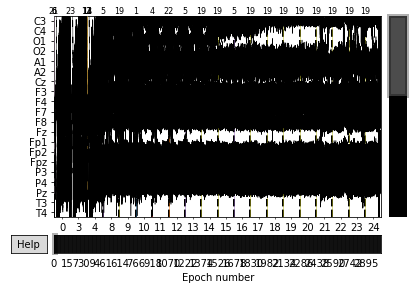

In [16]:
epochs_train.plot(block=True, events=events);

<ipython-input-19-ba9c6abcfa9e>:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events, sfreq=data.info['sfreq']);


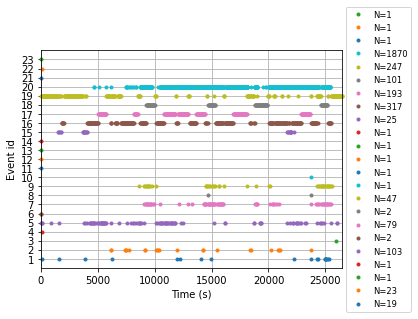

In [19]:
mne.viz.plot_events(events, sfreq=data.info['sfreq']);

In [2]:
X_psg1,y_psg1=datos('PSG1')

Extracting EDF parameters from /home/pabloro/master/PSG1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Oximeter Event', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
3031 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3031 events and 15360 original time points ...
1 bad epochs dropped


In [5]:
y_psg1.value_counts()

Sleep stage N2    317
Sleep stage W     246
Sleep stage N3    193
Sleep stage R     101
Sleep stage N1     25
Name: Label, dtype: int64

In [1]:
import pickle

with open("inputs_definitivo.pkl", "rb") as f:
    opciones = pickle.load(f)
    
X_train= opciones["inputs_train_definitivo"]
X_test= opciones["inputs_test_definitivo"]
y_train=opciones['output_train_definitivo']
y_test=opciones['output_test_definitivo']

In [2]:
from tensorflow.keras.models import load_model

model=load_model('definitiva.h5')

In [46]:
import pandas as pd
import numpy as np

train_preds=pd.DataFrame(data={'Real':y_train,'Prediccion':np.argmax(model.predict(X_train),axis=1),'set':'train'})
test_preds=pd.DataFrame(data={'Real':y_test,'Prediccion':np.argmax(model.predict(X_test),axis=1),'set':'test'})
todos_preds=pd.concat([train_preds,test_preds],axis=0)

In [47]:
errores=todos_preds[todos_preds.Real!=todos_preds.Prediccion].sort_index()

In [48]:
errores['Real']=np.where(errores.Real==0,'Sleep stage N1',np.where(errores.Real==1,'Sleep stage N2',np.where(errores.Real==2,'Sleep stage N3',np.where(errores.Real==3,'Sleep stage R','Sleep stage W'))))
errores['Prediccion']=np.where(errores.Prediccion==0,'Sleep stage N1',np.where(errores.Prediccion==1,'Sleep stage N2',np.where(errores.Prediccion==2,'Sleep stage N3',np.where(errores.Prediccion==3,'Sleep stage R','Sleep stage W'))))

In [54]:
indices_erroneos=errores.index.values

In [113]:
diccionarios,valores,channels,lab=datos('PSG1')

Extracting EDF parameters from /home/pabloro/master/PSG1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-112-b48beb632d79>:9: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-112-b48beb632d79>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Oximeter Event', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
3031 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3031 events and 15360 original time points ...
1 bad epochs dropped


In [116]:
np.shape(diccionarios)

(882,)

In [108]:
for v in valores:
    print(v.shape)

(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50, 15360)
(50,

In [55]:
ind=indices_erroneos[indices_erroneos<882]
ind.shape

(216,)

In [117]:
np.shape(np.random.rand(5, 256*300)*200)

(5, 76800)

In [87]:
np.shape([valores[i] for i in ind])

(216, 50, 15360)

In [90]:
erroneos_paciente1=[valores[i] for i in ind]

In [96]:
np.shape(erroneos_paciente1)[0]

216

In [61]:
erroneos_etiquetas_paciente1=lab[ind]

In [120]:
erroneos_etiquetas_paciente1.values

array(['Sleep stage N1', 'Sleep stage N1', 'Sleep stage N1',
       'Sleep stage N1', 'Sleep stage N1', 'Sleep stage N2',
       'Sleep stage N2', 'Sleep stage N2', 'Sleep stage N2',
       'Sleep stage N2', 'Sleep stage N2', 'Sleep stage N2',
       'Sleep stage W', 'Sleep stage N1', 'Sleep stage N1',
       'Sleep stage N1', 'Sleep stage N1', 'Sleep stage N1',
       'Sleep stage N1', 'Sleep stage N1', 'Sleep stage W',
       'Sleep stage N1', 'Sleep stage N1', 'Sleep stage N1',
       'Sleep stage N2', 'Sleep stage N2', 'Sleep stage N2',
       'Sleep stage N2', 'Sleep stage N3', 'Sleep stage W',
       'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W',
       'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W',
       'Sleep stage W', 'Sleep stage N2', 'Sleep stage N2',
       'Sleep stage N2', 'Sleep stage N2', 'Sleep stage N2',
       'Sleep stage N2', 'Sleep stage N2', 'Sleep stage N2',
       'Sleep stage N2', 'Sleep stage N2', 'Sleep stage N2',


In [126]:
annotations=[[i, 0, d] for i,d in zip(range(0,15390,30),erroneos_etiquetas_paciente1.values)]

In [127]:
from pyedflib import highlevel

signals = np.reshape(erroneos_paciente1,newshape=((np.shape(erroneos_paciente1)[1],np.shape(erroneos_paciente1)[2]*np.shape(erroneos_paciente1)[0]))) # 5 minutes of random signal
channel_names = channels

signal_headers = highlevel.make_signal_headers(channel_names,sample_rate=256)
header = highlevel.make_header(patientname='patient_x', gender='Female')
header['annotations'] = annotations
highlevel.write_edf('red1.edf', signals, signal_headers, header)

True

In [88]:
signals.shape

(5, 76800)

In [69]:
signal_headers

[{'label': 'ch1',
  'dimension': 'uV',
  'sample_rate': 256,
  'physical_min': -200.0,
  'physical_max': 200.0,
  'digital_min': -32768,
  'digital_max': 32767,
  'transducer': '',
  'prefilter': ''},
 {'label': 'ch2',
  'dimension': 'uV',
  'sample_rate': 256,
  'physical_min': -200.0,
  'physical_max': 200.0,
  'digital_min': -32768,
  'digital_max': 32767,
  'transducer': '',
  'prefilter': ''},
 {'label': 'ch3',
  'dimension': 'uV',
  'sample_rate': 256,
  'physical_min': -200.0,
  'physical_max': 200.0,
  'digital_min': -32768,
  'digital_max': 32767,
  'transducer': '',
  'prefilter': ''},
 {'label': 'ch4',
  'dimension': 'uV',
  'sample_rate': 256,
  'physical_min': -200.0,
  'physical_max': 200.0,
  'digital_min': -32768,
  'digital_max': 32767,
  'transducer': '',
  'prefilter': ''},
 {'label': 'ch5',
  'dimension': 'uV',
  'sample_rate': 256,
  'physical_min': -200.0,
  'physical_max': 200.0,
  'digital_min': -32768,
  'digital_max': 32767,
  'transducer': '',
  'prefilter': 